In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import FuncFormatter
import numpy as np

In [21]:
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_1_week_People")
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_1_week_mixed")
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_1_week_Food")

os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/2023-08-07 04.00.00")

In [22]:
extension = 'csv'

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]


In [23]:
numitems_people = len(user_filenames)
print(numitems_people)

numitems_food = len(food_filenames)
print(numitems_food)

0
9


In [24]:
df_total_user = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 df_total_user.append(temp_f)

In [30]:
df_total_food = []

for f in food_filenames:
 temp_f = pd.read_csv(f)
 df_total_food.append(temp_f)

In [31]:
df_total_food

[       Cycle  Day      Time  NumBikes  Battery  AutDrivingSpeed  \
 0        203    7  01:41:30       164  70000.0              8.0   
 1        319    7  02:39:30       164  70000.0              8.0   
 2        345    7  02:52:30       164  70000.0              8.0   
 3        353    7  02:56:30       164  70000.0              8.0   
 4        393    7  03:16:30       164  70000.0              8.0   
 ...      ...  ...       ...       ...      ...              ...   
 30074  20081   13  23:20:30       308  70000.0              8.0   
 30075  20089   13  23:24:30       308  70000.0              8.0   
 30076  20096   13  23:28:00       308  70000.0              8.0   
 30077  20096   13  23:28:00       308  70000.0              8.0   
 30078  20103   13  23:31:30       308  70000.0              8.0   
 
        MaxBiddingTime  PackBidCt  PackBidDist  PackBidQueue  ...  Trip Served  \
 0                   0      100.0         0.01           2.0  ...         True   
 1                

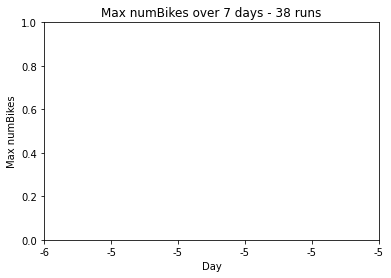

In [32]:
# Step 1: Loop over the list of dataframes and extract the maximum "NumBikes" for each day
max_values = []
for df in df_total_user:
    max_values.append(df.groupby('Day')['NumBikes'].max())

# Step 2: Create a figure and axes for the plot
fig, ax = plt.subplots()

# Step 4: Plot the lines for each dataframe
for i, values in enumerate(max_values):
    ax.plot(values.index, values.values, label=f'Dataframe {i+1}')

# Step 5: Add labels, legend, and title to the plot
ax.set_xlabel('Day')
ax.set_ylabel('Max numBikes')
#ax.legend()

# Define the custom tick formatter function
def subtract_six(x, pos):
    return int(x - 6)

# Create the custom tick formatter for the x-axis
formatter = FuncFormatter(subtract_six)
ax.xaxis.set_major_formatter(formatter)


plt.title('Max numBikes over 7 days - 38 runs')

# Step 6: Display the plot
plt.show()


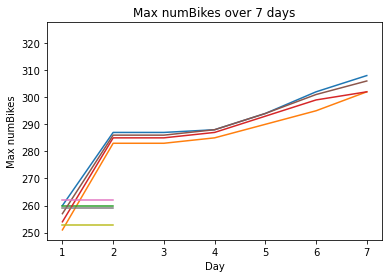

In [33]:
# Step 1: Loop over the list of dataframes and extract the maximum "NumBikes" for each day
max_values = []
for df in df_total_food:
    max_values.append(df.groupby('Day')['NumBikes'].max())

# Step 2: Create a figure and axes for the plot
fig, ax = plt.subplots()

# Step 4: Plot the lines for each dataframe
for i, values in enumerate(max_values):
    ax.plot(values.index, values.values, label=f'Dataframe {i+1}')

# Step 5: Add labels, legend, and title to the plot
ax.set_xlabel('Day')
ax.set_ylabel('Max numBikes')
#ax.legend()

# Define the custom tick formatter function
def subtract_six(x, pos):
    return int(x - 6)

# Create the custom tick formatter for the x-axis
formatter = FuncFormatter(subtract_six)
ax.xaxis.set_major_formatter(formatter)


plt.title('Max numBikes over 7 days')

# Step 6: Display the plot
plt.show()

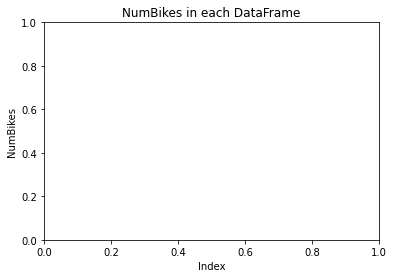

In [10]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_user):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

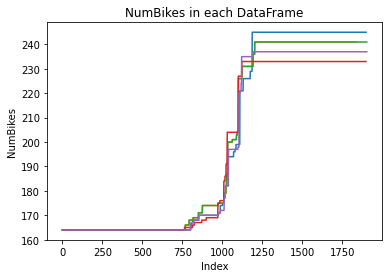

In [11]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_food):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

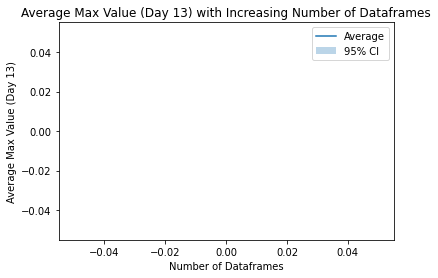

In [13]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_13 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_user):
    max_value_day_13 = df.loc[df['Day'] == 13, 'NumBikes'].max()
    max_values_day_13.append(max_value_day_13)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_13[:i + 1])
    std_value = np.std(max_values_day_13[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_user) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Max Value (Day 13)')
plt.title('Average Max Value (Day 13) with Increasing Number of Dataframes')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_user = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [14]:
print(df_table_user)


Empty DataFrame
Columns: [Number of Dataframes, Average, CI Lower, CI Upper, CI Delta]
Index: []


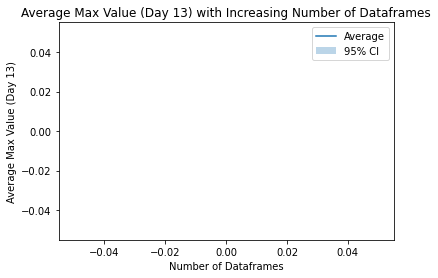

In [15]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_13 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_food):
    max_value_day_13 = df.loc[df['Day'] == 13, 'NumBikes'].max()
    max_values_day_13.append(max_value_day_13)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_13[:i + 1])
    std_value = np.std(max_values_day_13[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_food) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Max Value (Day 13)')
plt.title('Average Max Value (Day 13) with Increasing Number of Dataframes')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_food = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [16]:
print(df_table_food)

   Number of Dataframes  Average  CI Lower  CI Upper  CI Delta
0                     1      NaN       NaN       NaN       NaN
1                     2      NaN       NaN       NaN       NaN
2                     3      NaN       NaN       NaN       NaN
3                     4      NaN       NaN       NaN       NaN
4                     5      NaN       NaN       NaN       NaN
